### Judul

"Analisis Konsumsi Energi Global Menggunakan Clustering KMeans dan Visualisasi Data Interaktif"

### Pendahuluan

Konsumsi energi global merupakan indikator utama dalam mengukur pembangunan ekonomi dan kesejahteraan suatu negara. Selain itu, pola konsumsi energi juga berkaitan erat dengan isu-isu strategis seperti ketahanan energi, keberlanjutan lingkungan, serta emisi gas rumah kaca. Dalam beberapa dekade terakhir, dunia telah menghadapi tantangan besar dalam menyeimbangkan antara kebutuhan energi yang terus meningkat dengan dampaknya terhadap lingkungan.

Data konsumsi energi yang kompleks dari berbagai negara dapat dianalisis untuk menemukan pola tersembunyi yang menggambarkan karakteristik konsumsi energi suatu negara. Salah satu pendekatan yang efektif untuk menganalisis data semacam ini adalah melalui penerapan **kecerdasan buatan (Artificial Intelligence)**, khususnya teknik _unsupervised learning_ seperti **KMeans Clustering**. Pendekatan ini memungkinkan pengelompokan negara-negara berdasarkan kemiripan dalam konsumsi energi, ketergantungan terhadap bahan bakar fosil, proporsi energi terbarukan, serta tingkat emisi karbon.

Penelitian ini bertujuan untuk membangun model AI berbasis **KMeans Clustering** yang dapat mengelompokkan negara-negara ke dalam beberapa klaster dengan karakteristik konsumsi energi yang berbeda. Model ini kemudian dianalisis dan divisualisasikan secara interaktif untuk memberikan gambaran yang lebih mendalam terhadap pola konsumsi energi global.

Dengan demikian, penelitian ini tidak hanya bertujuan untuk mengeksplorasi data energi secara deskriptif, tetapi juga untuk mengintegrasikan model AI sebagai alat bantu dalam memahami dinamika konsumsi energi lintas negara dan waktu.

### Import Library

In [1]:
# Pengolahan data
import pandas as pd
import numpy as np

# Visualisasi interaktif dengan Bokeh
from bokeh.plotting import figure, show, output_file, output_notebook
from bokeh.models import ColumnDataSource, HoverTool, FactorRange
from bokeh.layouts import column, row
from bokeh.models import ColumnDataSource, LinearColorMapper, ColorBar, BasicTicker, PrintfTickFormatter
from bokeh.transform import transform
from bokeh.palettes import Viridis256
from bokeh.transform import cumsum
from bokeh.palettes import Category20c
from bokeh.transform import linear_cmap
from bokeh.transform import factor_cmap
from bokeh.layouts import gridplot

# Visualisasi statistik tambahan
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & analisis numerik
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Tambahan
from math import pi
import warnings
warnings.filterwarnings("ignore")

### 🧾 Eksplorasi Data Energi Global

### Load Dataset

### 📌 Informasi Umum Dataset:

In [2]:
# Load dan periksa data
df = pd.read_csv("global_energy_consumption.csv")
print(df.info())
print("\nNilai kosong per kolom:\n", df.isnull().sum())
print("\nJumlah duplikat:", df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          10000 non-null  object 
 1   Year                             10000 non-null  int64  
 2   Total Energy Consumption (TWh)   10000 non-null  float64
 3   Per Capita Energy Use (kWh)      10000 non-null  float64
 4   Renewable Energy Share (%)       10000 non-null  float64
 5   Fossil Fuel Dependency (%)       10000 non-null  float64
 6   Industrial Energy Use (%)        10000 non-null  float64
 7   Household Energy Use (%)         10000 non-null  float64
 8   Carbon Emissions (Million Tons)  10000 non-null  float64
 9   Energy Price Index (USD/kWh)     10000 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 781.4+ KB
None

Nilai kosong per kolom:
 Country                            0
Year            

### 📌 Pembersihan Data:

In [3]:
# Hapus baris dengan nilai kosong
df_clean = df.dropna()

### 📈 Statistik Deskriptif:

In [4]:
# Statistik deskriptif
df_clean.describe()

,Year,Total Energy Consumption (TWh),Per Capita Energy Use (kWh),Renewable Energy Share (%),Fossil Fuel Dependency (%),Industrial Energy Use (%),Household Energy Use (%),Carbon Emissions (Million Tons),Energy Price Index (USD/kWh)
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2012.151400,5142.564425,25039.950516,47.322925,44.932851,40.057585,25.043290,2536.148007,0.273466
std,7.155236,2848.754040,14205.659284,24.603767,20.202800,11.538756,8.597024,1424.105067,0.130782
min,2000.000000,100.480000,500.270000,5.000000,10.010000,20.000000,10.000000,50.640000,0.050000
25%,2006.000000,2713.882500,12683.220000,26.110000,27.337500,30.217500,17.610000,1293.330000,0.160000
50%,2012.000000,5190.850000,25098.770000,47.150000,45.110000,39.980000,25.090000,2568.015000,0.270000
75%,2018.000000,7579.977500,37113.282500,68.682500,62.430000,50.150000,32.570000,3766.182500,0.390000
max,2024.000000,9999.260000,49989.570000,90.000000,80.000000,60.000000,40.000000,4999.340000,0.500000


### 📊 Distribusi Jumlah Data per Tahun:

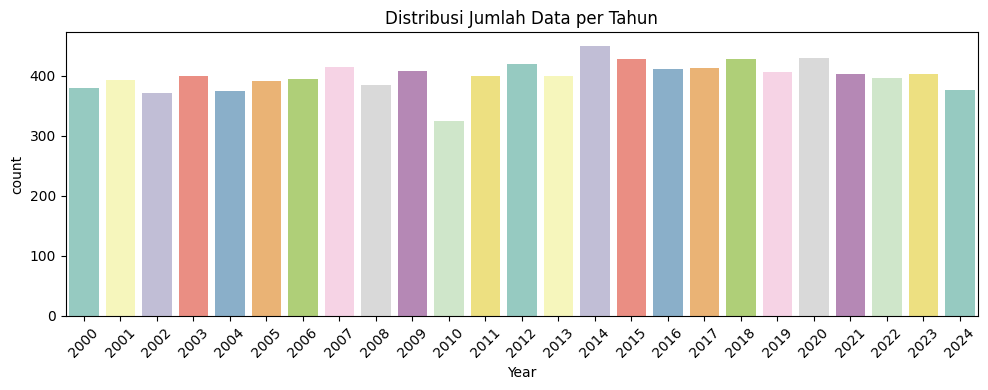

In [5]:
plt.figure(figsize=(10, 4))
sns.countplot(x='Year', data=df_clean, palette="Set3")
plt.title("Distribusi Jumlah Data per Tahun")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 📊 10 Negara dengan Jumlah Data Terbanyak:

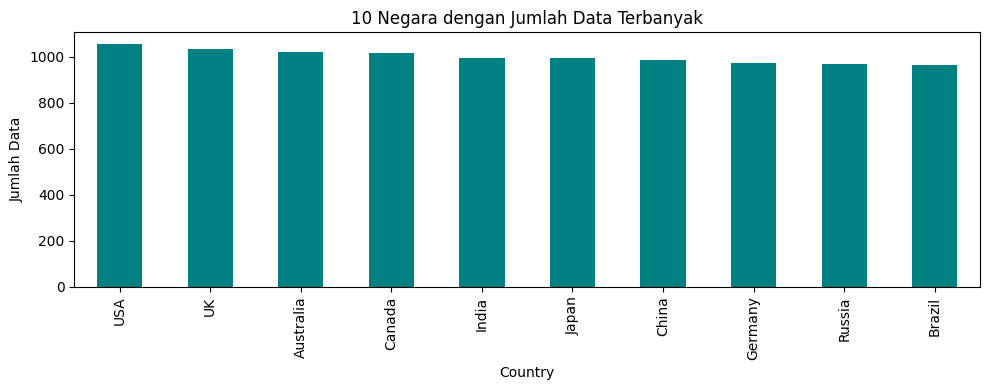

In [6]:
plt.figure(figsize=(10, 4))
df_clean["Country"].value_counts().head(10).plot(kind='bar', color='teal')
plt.title("10 Negara dengan Jumlah Data Terbanyak")
plt.ylabel("Jumlah Data")
plt.tight_layout()
plt.show()

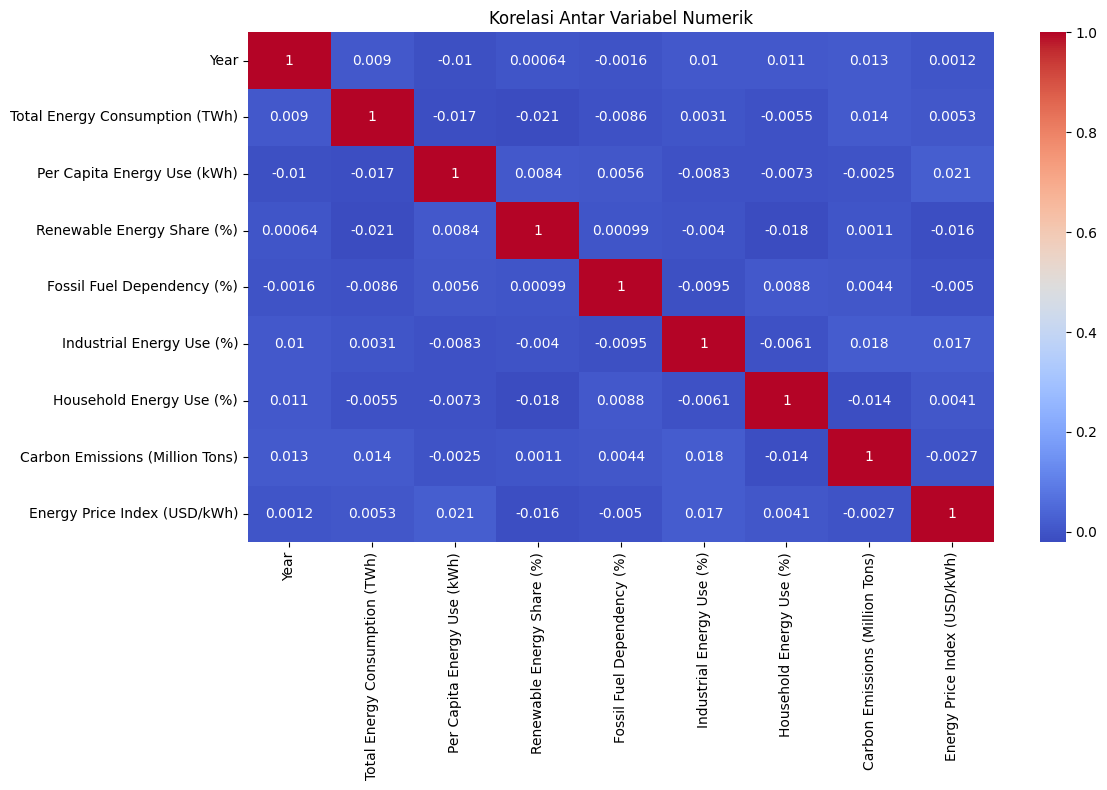

In [7]:
plt.figure(figsize=(12, 8))
numeric_cols = df_clean.select_dtypes(include='number').columns
sns.heatmap(df_clean[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Korelasi Antar Variabel Numerik")
plt.tight_layout()
plt.show()

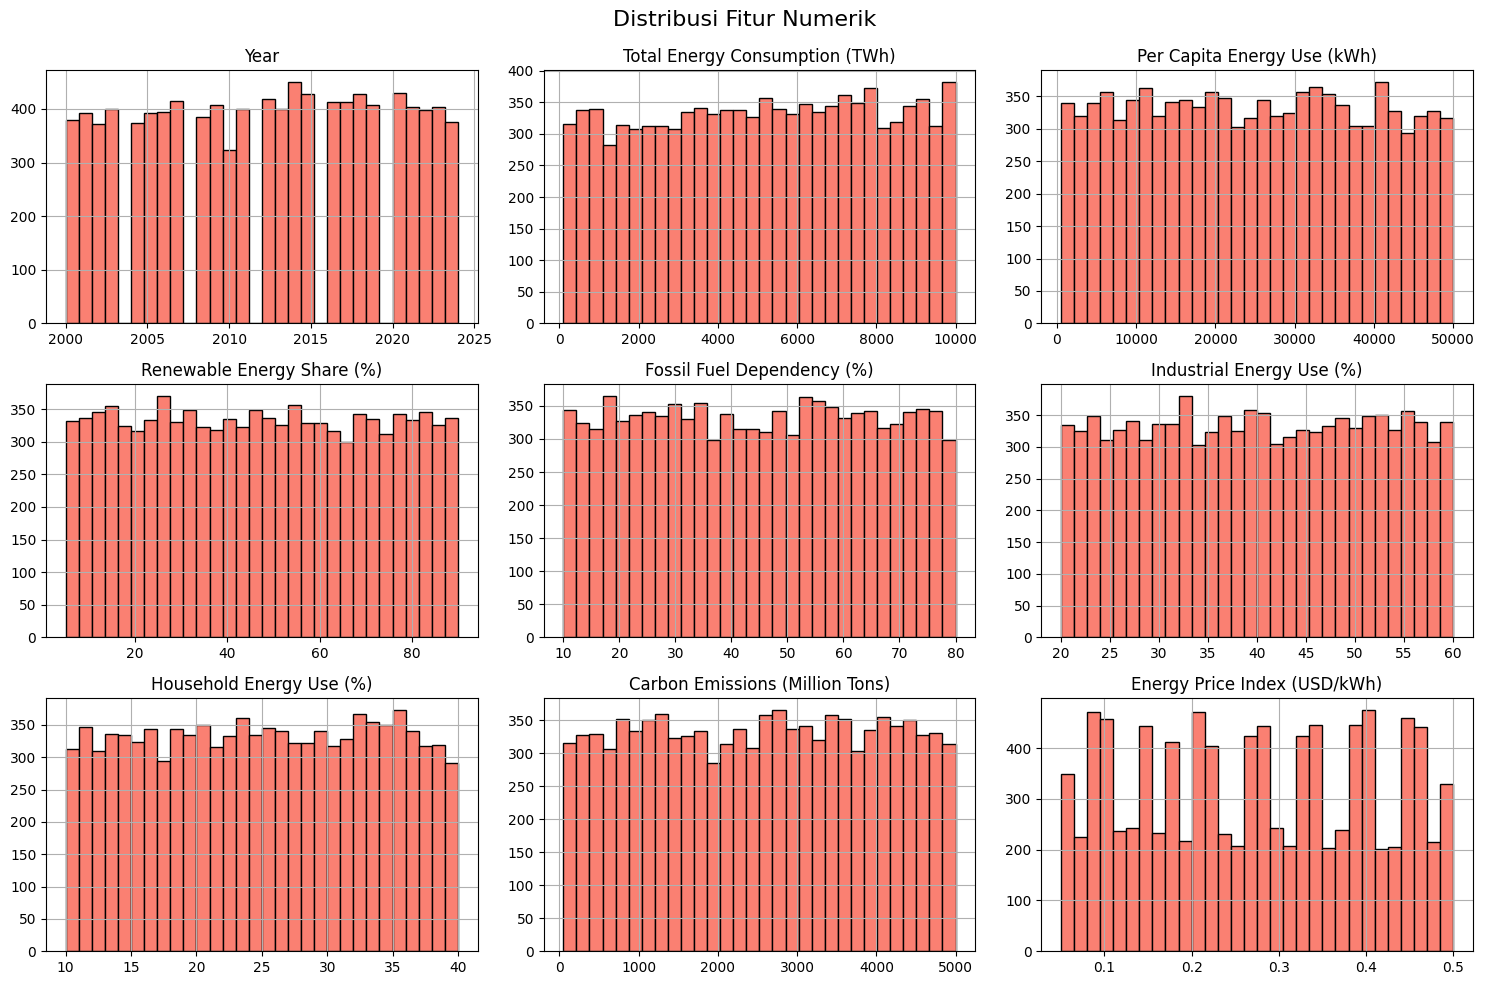

In [8]:
df_numeric = df_clean.select_dtypes(include='number')
df_numeric.hist(bins=30, figsize=(15, 10), color='salmon', edgecolor='black')
plt.suptitle("Distribusi Fitur Numerik", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

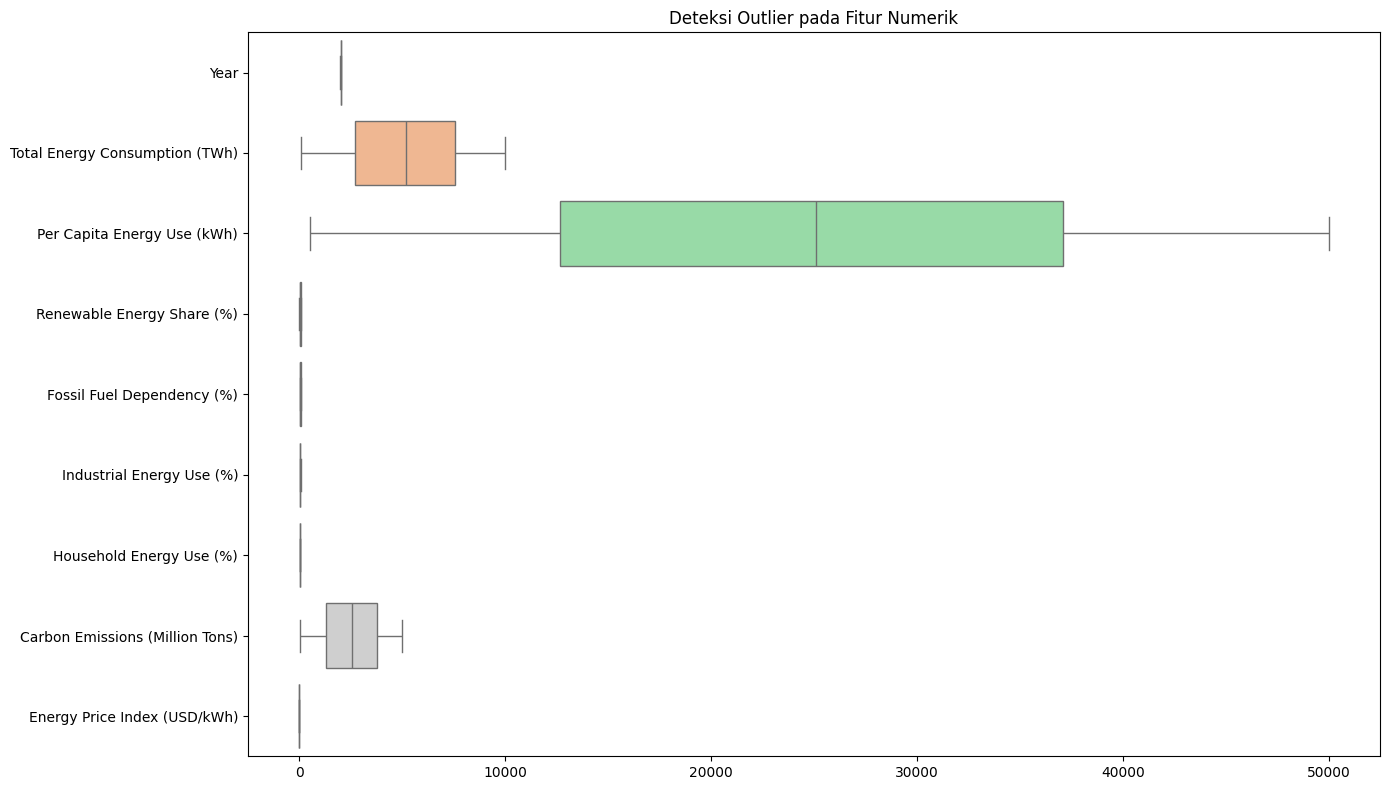

In [9]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_numeric, orient="h", palette="pastel")
plt.title("Deteksi Outlier pada Fitur Numerik")
plt.tight_layout()
plt.show()

### Model AI

In [10]:
# === LOAD DATASET ===
df = pd.read_csv("global_energy_consumption.csv")
df_clean = df.dropna()

In [11]:
# === FITUR UNTUK CLUSTERING ===
features = [
    "Total Energy Consumption (TWh)",
    "Per Capita Energy Use (kWh)",
    "Renewable Energy Share (%)",
    "Fossil Fuel Dependency (%)",
    "Carbon Emissions (Million Tons)",
    "Energy Price Index (USD/kWh)"
]

X = df_clean[features]

In [12]:
# === NORMALISASI DATA ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
# === AGGLOMERATIVE CLUSTERING (dengan k=3) ===
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(X_scaled)

In [14]:
# === PCA UNTUK VISUALISASI (2D) ===
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [15]:
# === TAMBAHKAN HASIL KE DATAFRAME ===
df_clean["Cluster"] = agglo_labels
df_clean["PC1"] = X_pca[:, 0]
df_clean["PC2"] = X_pca[:, 1]

In [16]:
# === EVALUASI MODEL ===
sil_score = silhouette_score(X_scaled, agglo_labels)
print("Silhouette Score Agglomerative Clustering:", round(sil_score, 3))

Silhouette Score Agglomerative Clustering: 0.058


In [17]:
# === PROFIL CLUSTER ===
cluster_profile = df_clean.groupby("Cluster")[features].mean().round(2)
print("\nProfil Rata-rata Tiap Cluster (Agglomerative):")
print(cluster_profile)


Profil Rata-rata Tiap Cluster (Agglomerative):
         Total Energy Consumption (TWh)  Per Capita Energy Use (kWh)  \
Cluster                                                                
0                               5956.95                     27066.24   
1                               3846.96                     25535.34   
2                               5465.73                     21756.72   

         Renewable Energy Share (%)  Fossil Fuel Dependency (%)  \
Cluster                                                           
0                             38.70                       54.16   
1                             41.31                       38.26   
2                             65.59                       39.79   

         Carbon Emissions (Million Tons)  Energy Price Index (USD/kWh)  
Cluster                                                                 
0                                2553.49                          0.22  
1                                198

In [18]:
# === OPSIONAL: SIMPAN HASIL ===
df_clean.to_csv("hasil_agglo_clustering.csv", index=False)
cluster_profile.to_csv("profil_agglo_cluster.csv")

### Visualisasi 1

In [19]:
# %% [markdown]
# Visualisasi Interaktif: Konsumsi Energi Tahunan

# %%
import pandas as pd
from bokeh.plotting import figure, show, output_file
from bokeh.models import ColumnDataSource, HoverTool

# 1. Output ke file HTML
output_file("visualisasi_konsumsi_energi_tahunan.html")

#Tampilkan output langsung di notebook
output_notebook()

# 2. Load dan bersihkan data
df = pd.read_csv("global_energy_consumption.csv")
df_clean = df.dropna()

# 3. Hitung rata-rata konsumsi energi per tahun
energy_avg = df_clean.groupby("Year")["Total Energy Consumption (TWh)"].mean().reset_index()
source = ColumnDataSource(energy_avg)

# 4. Buat figure Bokeh
p = figure(
    title="Rata-rata Konsumsi Energi Total per Tahun",
    x_axis_label='Tahun',
    y_axis_label='Energi (TWh)',
    width=800,
    height=400,
    tools="pan,wheel_zoom,box_zoom,reset,hover,save"
)

# 5. Tambahkan garis dan titik
p.line(x='Year', y='Total Energy Consumption (TWh)', source=source, line_width=2, color="navy")
p.circle(x='Year', y='Total Energy Consumption (TWh)', source=source, size=6, color="navy", alpha=0.6)

# 6. Hover Tooltips
p.add_tools(HoverTool(
    tooltips=[
        ("Tahun", "@Year"),
        ("Energi", "@{Total Energy Consumption (TWh)}{0.0}")
    ]
))

# 7. Tampilkan ke browser
show(p)


Loading BokehJS ...

### Visualisasi 2

In [20]:
from bokeh.palettes import Category10
# Output ke notebook dan file HTML
output_notebook()
output_file("top10_konsumsi_energi_per_negara.html")

# Load dan bersihkan data
df = pd.read_csv("global_energy_consumption.csv")
df_clean = df.dropna()

# Hitung rata-rata konsumsi energi per negara
country_avg = df_clean.groupby("Country")["Total Energy Consumption (TWh)"].mean().reset_index()

# Ambil 10 negara dengan konsumsi energi tertinggi
top10 = country_avg.sort_values(by="Total Energy Consumption (TWh)", ascending=False).head(10)

# Tambahkan kolom warna
top10["color"] = Category10[10]

# Buat ColumnDataSource untuk Bokeh
source = ColumnDataSource(top10)

#  Buat figure Bokeh
p2 = figure(
    x_range=top10["Country"],
    title="10 Negara dengan Rata-rata Konsumsi Energi Tertinggi",
    x_axis_label='Negara',
    y_axis_label='Rata-rata Konsumsi Energi (TWh)',
    width=800,
    height=400,
    tools="pan,box_zoom,reset,hover,save"
)

#  Tambahkan batang vertikal dengan warna dari kolom
p2.vbar(
    x='Country',
    top='Total Energy Consumption (TWh)',
    source=source,
    width=0.6,
    fill_color='color'
)

#  Tambahkan hover tool
p2.add_tools(HoverTool(tooltips=[
    ("Negara", "@Country"),
    ("Energi", "@{Total Energy Consumption (TWh)}{0.0}")
]))

#  Rotasi label negara dan perbaiki estetika
p2.xaxis.major_label_orientation = 1.0
p2.title.align = 'center'
p2.title.text_font_size = '14pt'

#  Tampilkan ke notebook dan simpan ke HTML
show(p2)

Loading BokehJS ...

### Visualisasi 3

In [21]:
# Output ke notebook & HTML
output_notebook()
output_file("rata_emisi_karbon_per_tahun.html")

# Load dan bersihkan data
df = pd.read_csv("global_energy_consumption.csv")
df_clean = df.dropna()

# Hitung rata-rata emisi karbon per tahun
emission_avg = df_clean.groupby("Year")["Carbon Emissions (Million Tons)"].mean().reset_index()
source = ColumnDataSource(emission_avg)

# Buat grafik garis
p3 = figure(
    title="Rata-rata Emisi Karbon Global per Tahun",
    x_axis_label='Tahun',
    y_axis_label='Emisi Karbon (Juta Ton)',
    width=800,
    height=400,
    tools="pan,box_zoom,reset,hover,save"
)

p3.line(x='Year', y='Carbon Emissions (Million Tons)', source=source, line_width=2, color="firebrick")
p3.circle(x='Year', y='Carbon Emissions (Million Tons)', source=source, size=6, color="firebrick", alpha=0.6)

# Tambahkan hover
p3.add_tools(HoverTool(tooltips=[
    ("Tahun", "@Year"),
    ("Emisi", "@{Carbon Emissions (Million Tons)}{0.0}")
]))

# Tampilkan ke notebook
show(p3)

Loading BokehJS ...

### Visualisasi 4

In [22]:
# Output ke notebook & HTML
output_notebook()
output_file("top10_energi_terbarukan_horizontal.html")

# Load dan bersihkan data
df = pd.read_csv("global_energy_consumption.csv")
df_clean = df.dropna()

# Hitung rata-rata energi terbarukan per negara
renew_avg = df_clean.groupby("Country")["Renewable Energy Share (%)"].mean().reset_index()

# Ambil 10 tertinggi
top10_renew = renew_avg.sort_values(by="Renewable Energy Share (%)", ascending=False).head(10)
top10_renew["Color"] = Category10[10]
top10_renew = top10_renew.sort_values("Renewable Energy Share (%)")  # urut bawah ke atas

# Data source
source = ColumnDataSource(top10_renew)

# Buat figure horizontal bar chart
p = figure(
    y_range=top10_renew["Country"],
    width=800,
    height=400,
    title="Top 10 Negara dengan Rata-rata Proporsi Energi Terbarukan Tertinggi",
    x_axis_label='Proporsi Energi Terbarukan (%)',
    tools="pan,box_zoom,reset,hover,save"
)

# Bar horizontal
p.hbar(
    y='Country',
    right='Renewable Energy Share (%)',
    height=0.6,
    source=source,
    fill_color='Color'
)

# Hover tool
p.add_tools(HoverTool(tooltips=[
    ("Negara", "@Country"),
    ("Energi Terbarukan", "@{Renewable Energy Share (%)}{0.0}%")
]))

# Tampilkan
show(p)

Loading BokehJS ...

### Visualisasi 5

In [23]:
# Output ke notebook dan HTML
output_notebook()
output_file("area_emisi_karbon_per_tahun.html")

# Load data
df = pd.read_csv("global_energy_consumption.csv")
df_clean = df.dropna()

# Hitung rata-rata emisi karbon global per tahun
carbon_avg = df_clean.groupby("Year")["Carbon Emissions (Million Tons)"].mean().reset_index()
source = ColumnDataSource(carbon_avg)

# Buat area chart dengan Bokeh
p = figure(
    title="Tren Rata-rata Emisi Karbon Global per Tahun",
    x_axis_label="Tahun",
    y_axis_label="Emisi Karbon (Juta Ton)",
    width=800,
    height=400,
    tools="pan,box_zoom,reset,hover,save"
)

# Area chart
p.varea(
    x='Year',
    y1=0,
    y2='Carbon Emissions (Million Tons)',
    source=source,
    fill_color="firebrick",
    fill_alpha=0.5
)

# Tambahkan titik dan garis
p.line(x='Year', y='Carbon Emissions (Million Tons)', source=source, line_width=2, color="firebrick")
p.circle(x='Year', y='Carbon Emissions (Million Tons)', source=source, size=6, color="firebrick")

# Hover tooltips
p.add_tools(HoverTool(tooltips=[
    ("Tahun", "@Year"),
    ("Emisi", "@{Carbon Emissions (Million Tons)}{0.0}")
]))

# Tampilkan
show(p)

Loading BokehJS ...

### Visualisasi 6

In [24]:
# Output ke file HTML
output_file("donut_chart_komposisi_energi.html")

# Load data
df = pd.read_csv("global_energy_consumption.csv")
df_clean = df.dropna()

# Hitung rata-rata proporsi energi global
renew = df_clean["Renewable Energy Share (%)"].mean()
fossil = df_clean["Fossil Fuel Dependency (%)"].mean()
other = 100 - (renew + fossil)

# Buat DataFrame komposisi
data = pd.Series({
    'Energi Terbarukan': renew,
    'Bahan Bakar Fosil': fossil,
    'Lainnya': other
}).reset_index(name='value').rename(columns={'index': 'sumber'})

# Hitung sudut
data['angle'] = data['value'] / data['value'].sum() * 2 * pi
data['color'] = Category20c[len(data)]

# Buat plot
p = figure(
    height=400,
    width=400,
    title="Komposisi Rata-rata Sumber Energi Global",
    toolbar_location=None,
    tools="hover",
    tooltips="@sumber: @value{0.2f}%",
    x_range=(-0.5, 1.0)
)

# Pie chart
p.wedge(
    x=0, y=1,
    radius=0.4,
    start_angle=cumsum('angle', include_zero=True),
    end_angle=cumsum('angle'),
    line_color="white",
    fill_color='color',
    legend_field='sumber',
    source=data
)

# Tambahkan "donut hole"
p.annular_wedge(
    x=0, y=1,
    inner_radius=0.2,
    outer_radius=0.4,
    start_angle=cumsum('angle', include_zero=True),
    end_angle=cumsum('angle'),
    fill_color='color',
    line_color="white",
    source=data
)

# Styling
p.axis.visible = False
p.grid.visible = False

show(p)

### Visualisasi 7

In [25]:
# Hitung matriks korelasi
corr_matrix = df_clean[features].corr().round(2)

# Ubah ke format long-form untuk Bokeh
corr_df = corr_matrix.stack().reset_index()
corr_df.columns = ["Feature_X", "Feature_Y", "Correlation"]

# Bokeh data source
source = ColumnDataSource(corr_df)

# Warna
mapper = LinearColorMapper(palette=Viridis256, low=-1, high=1)

# Bokeh figure
p = figure(
    title="Heatmap Korelasi Antar Fitur Energi",
    x_range=features,
    y_range=list(reversed(features)),
    x_axis_location="above",
    width=800, height=600,
    tools="hover,save",
    tooltips=[('X', '@Feature_X'), ('Y', '@Feature_Y'), ('Korelasi', '@Correlation')]
)

# Gambar kotak warna
p.rect(
    x="Feature_X", y="Feature_Y",
    width=1, height=1,
    source=source,
    fill_color=transform('Correlation', mapper),
    line_color=None
)

# Tambahkan color bar
color_bar = ColorBar(
    color_mapper=mapper,
    ticker=BasicTicker(desired_num_ticks=10),
    formatter=PrintfTickFormatter(format="%.2f"),
    label_standoff=12,
    border_line_color=None,
    location=(0, 0)
)

p.add_layout(color_bar, 'right')
p.xaxis.major_label_orientation = np.pi / 4

# Tampilkan
show(p)

### Visualisasi 8

In [26]:
# Output ke notebook & file HTML
output_notebook()
output_file("emisi_vs_energi_terbarukan_top10.html")

# Load dan bersihkan data
df = pd.read_csv("global_energy_consumption.csv")
df_clean = df.dropna(subset=["Carbon Emissions (Million Tons)", "Renewable Energy Share (%)"])

# Ambil 10 negara dengan emisi tertinggi (rata-rata)
top10 = df_clean.groupby("Country")["Carbon Emissions (Million Tons)"].mean().reset_index()
top10 = top10.sort_values(by="Carbon Emissions (Million Tons)", ascending=False).head(10)

# Filter data asli hanya untuk top 10 negara tersebut
df_top10 = df_clean[df_clean["Country"].isin(top10["Country"])]

# Hitung rata-rata per negara (2 fitur)
avg_top10 = df_top10.groupby("Country")[[
    "Carbon Emissions (Million Tons)",
    "Renewable Energy Share (%)"
]].mean().reset_index()

# ColumnDataSource untuk Bokeh
source = ColumnDataSource(avg_top10)

# Buat scatter plot
p = figure(
    title="Scatter Plot: Emisi Karbon vs Energi Terbarukan (Top 10 Negara)",
    x_axis_label="Proporsi Energi Terbarukan (%)",
    y_axis_label="Emisi Karbon (Juta Ton)",
    width=850, height=500,
    tools="pan,box_zoom,reset,hover,save"
)

p.circle(
    x='Renewable Energy Share (%)',
    y='Carbon Emissions (Million Tons)',
    size=10,
    source=source,
    fill_color=factor_cmap('Country', palette=Category10[10], factors=avg_top10["Country"].tolist()),
    line_color="black",
    fill_alpha=0.7,
    legend_field="Country"
)

# Hover Tooltips
p.add_tools(HoverTool(tooltips=[
    ("Negara", "@Country"),
    ("Energi Terbarukan", "@{Renewable Energy Share (%)}{0.0}%"),
    ("Emisi Karbon", "@{Carbon Emissions (Million Tons)}{0.0} Juta Ton")
]))

p.legend.location = "top_right"
p.legend.title = "Negara"
p.legend.click_policy = "hide"

# Tampilkan plot
show(p)

Loading BokehJS ...

### Visualisasi 1: Rata-rata Konsumsi Energi Tahunan berdasarkan Klaster (AI)

In [27]:
# Output ke file HTML
output_file("visualisasi_konsumsi_energi_tahunan_berdasarkan_klaster.html")

# Load hasil clustering
df = pd.read_csv("hasil_agglo_clustering.csv")

# Pastikan kolom 'Cluster' bertipe string agar bisa difactor-cmap
df["Cluster"] = df["Cluster"].astype(str)

# Hitung rata-rata energi tahunan per klaster
energy_by_year_cluster = df.groupby(["Year", "Cluster"])["Total Energy Consumption (TWh)"].mean().reset_index()

# Bokeh ColumnDataSource
source = ColumnDataSource(energy_by_year_cluster)

# Figure Bokeh
p = figure(
    title="Rata-rata Konsumsi Energi Tahunan berdasarkan Klaster (AI)",
    x_axis_label="Tahun",
    y_axis_label="Energi (TWh)",
    width=850,
    height=450,
    tools="pan,box_zoom,reset,hover,save"
)

# Tambahkan garis per klaster
clusters = sorted(df["Cluster"].unique())
colors = Category10[len(clusters)]

for i, cluster in enumerate(clusters):
    cluster_data = energy_by_year_cluster[energy_by_year_cluster["Cluster"] == cluster]
    p.line(
        x=cluster_data["Year"],
        y=cluster_data["Total Energy Consumption (TWh)"],
        line_width=2,
        color=colors[i],
        legend_label=f"Cluster {cluster}"
    )
    p.circle(
        x=cluster_data["Year"],
        y=cluster_data["Total Energy Consumption (TWh)"],
        size=5,
        color=colors[i],
        fill_alpha=0.7
    )

# Hover Tooltips
hover = HoverTool(tooltips=[
    ("Tahun", "@Year"),
    ("Klaster", "@Cluster"),
    ("Energi", "@{Total Energy Consumption (TWh)}{0.0} TWh")
])
p.add_tools(hover)

# Legenda
p.legend.title = "Klaster AI"
p.legend.location = "top_left"
p.legend.click_policy = "hide"

# Tampilkan plot
show(p)

### 🔍 Analisis Singkat: Rata-rata Konsumsi Energi Tahunan Berdasarkan Klaster AI
Visualisasi ini menunjukkan tren konsumsi energi tahunan rata-rata dari tiap klaster hasil Agglomerative Clustering. Garis berwarna mewakili masing-masing klaster, memperlihatkan perbedaan pola konsumsi energi antar kelompok negara.

Beberapa klaster mengalami kenaikan signifikan, sementara lainnya cenderung stabil. Ini mencerminkan bahwa negara dengan konsumsi energi serupa bisa memiliki dinamika pertumbuhan energi yang berbeda. Klasterisasi membantu mengidentifikasi pola ini untuk mendukung kebijakan energi yang lebih terarah.

### Visualisasi 2: Konsumsi Energi Tertinggi Berdasarkan Klaster AI

In [28]:
# Output ke notebook dan file HTML
output_notebook()
output_file("top10_konsumsi_energi_per_negara_berbasis_AI.html")

# === Load hasil clustering dari model AI ===
df = pd.read_csv("hasil_agglo_clustering.csv")
df["Cluster"] = df["Cluster"].astype(str)  # pastikan tipe string untuk pemetaan warna

# === Hitung rata-rata konsumsi energi per negara ===
country_avg = df.groupby(["Country", "Cluster"])["Total Energy Consumption (TWh)"].mean().reset_index()

# === Ambil 10 negara dengan konsumsi energi tertinggi ===
top10 = country_avg.sort_values(by="Total Energy Consumption (TWh)", ascending=False).head(10)

# Tambahkan warna berdasarkan Cluster
cluster_colors = {"0": Category10[3][0], "1": Category10[3][1], "2": Category10[3][2]}
top10["color"] = top10["Cluster"].map(cluster_colors)

# ColumnDataSource untuk Bokeh
source = ColumnDataSource(top10)

# === Buat figure Bokeh ===
p2 = figure(
    x_range=top10["Country"],
    title="Top 10 Negara dengan Konsumsi Energi Tertinggi Berdasarkan Klaster AI",
    x_axis_label='Negara',
    y_axis_label='Rata-rata Konsumsi Energi (TWh)',
    width=850,
    height=400,
    tools="pan,box_zoom,reset,hover,save"
)

# Tambahkan batang vertikal berwarna berdasarkan klaster
p2.vbar(
    x='Country',
    top='Total Energy Consumption (TWh)',
    source=source,
    width=0.6,
    fill_color='color',
    legend_field='Cluster'
)

# Hover tooltips
p2.add_tools(HoverTool(tooltips=[
    ("Negara", "@Country"),
    ("Energi", "@{Total Energy Consumption (TWh)}{0.0} TWh"),
    ("Klaster", "@Cluster")
]))

# Estetika
p2.xaxis.major_label_orientation = 1.0
p2.title.align = 'center'
p2.title.text_font_size = '14pt'
p2.legend.title = "Klaster AI"
p2.legend.location = "top_right"
p2.legend.click_policy = "hide"

# Tampilkan grafik
show(p2)


Loading BokehJS ...

### 🔍 Analisis Visualisasi 2: Konsumsi Energi per Negara Berdasarkan Klaster AI

Visualisasi ini menampilkan 10 negara dengan konsumsi energi tertinggi dan klaster AI tempat mereka tergolong.
Setiap batang warna mewakili klaster hasil dari model Agglomerative Clustering.

Klaster membantu mengelompokkan negara berdasarkan karakteristik seperti konsumsi per kapita, ketergantungan bahan bakar fosil, dan emisi karbon. Dengan ini, kita dapat melihat bahwa negara-negara dengan konsumsi energi tinggi tidak selalu berada di klaster yang sama — menunjukkan adanya perbedaan signifikan dalam pola penggunaan energi.

### Visualisasi 3 dengan AI: Emisi Karbon per Tahun Berdasarkan Klaster

In [29]:
# Output ke HTML dan notebook
output_notebook()
output_file("rata_emisi_karbon_per_tahun_per_klaster.html")

# Load hasil clustering
df = pd.read_csv("hasil_agglo_clustering.csv")
df["Cluster"] = df["Cluster"].astype(str)

# Hitung rata-rata emisi karbon per tahun per klaster
emission_by_year_cluster = df.groupby(["Year", "Cluster"])["Carbon Emissions (Million Tons)"].mean().reset_index()

# ColumnDataSource
source = ColumnDataSource(emission_by_year_cluster)

# Buat figure
p3_ai = figure(
    title="Rata-rata Emisi Karbon per Tahun Berdasarkan Klaster AI",
    x_axis_label="Tahun",
    y_axis_label="Emisi Karbon (Juta Ton)",
    width=850,
    height=450,
    tools="pan,box_zoom,reset,hover,save"
)

# Plot garis untuk tiap klaster
clusters = sorted(df["Cluster"].unique())
colors = Category10[len(clusters)]

for i, cluster in enumerate(clusters):
    cluster_data = emission_by_year_cluster[emission_by_year_cluster["Cluster"] == cluster]
    p3_ai.line(
        x=cluster_data["Year"],
        y=cluster_data["Carbon Emissions (Million Tons)"],
        line_width=2,
        color=colors[i],
        legend_label=f"Cluster {cluster}"
    )
    p3_ai.circle(
        x=cluster_data["Year"],
        y=cluster_data["Carbon Emissions (Million Tons)"],
        size=5,
        color=colors[i],
        fill_alpha=0.7
    )

# Hover tooltips
hover = HoverTool(tooltips=[
    ("Tahun", "@Year"),
    ("Klaster", "@Cluster"),
    ("Emisi", "@{Carbon Emissions (Million Tons)}{0.0} Juta Ton")
])
p3_ai.add_tools(hover)

# Legenda dan tampilan
p3_ai.legend.title = "Klaster AI"
p3_ai.legend.location = "top_left"
p3_ai.legend.click_policy = "hide"
p3_ai.title.align = 'center'
p3_ai.title.text_font_size = '14pt'

# Tampilkan
show(p3_ai)

Loading BokehJS ...

### 🔍 Analisis Visualisasi 3: Emisi Karbon Global Berdasarkan Klaster AI

Visualisasi ini menampilkan tren rata-rata emisi karbon global per tahun untuk masing-masing klaster hasil model AI. Klaster yang cenderung memiliki emisi lebih tinggi menunjukkan karakteristik negara dengan konsumsi energi fosil dominan.  

Sebaliknya, klaster dengan tren penurunan atau emisi rendah dapat diindikasikan sebagai negara-negara yang mulai transisi ke energi bersih atau efisiensi tinggi. Tren ini membantu memahami peran klaster dalam kontribusi terhadap emisi karbon global dari waktu ke waktu.

### Visualisasi 4 dengan AI: Proporsi Energi Terbarukan Berdasarkan Klaster

In [30]:
# Output
output_notebook()
output_file("proporsi_energi_terbarukan_per_klaster.html")

# Load data hasil klaster
df = pd.read_csv("hasil_agglo_clustering.csv")
df["Cluster"] = df["Cluster"].astype(str)

# Hitung rata-rata energi terbarukan tiap klaster
renew_cluster = df.groupby("Cluster")["Renewable Energy Share (%)"].mean().reset_index()
renew_cluster["Color"] = Category10[len(renew_cluster)]

# ColumnDataSource
source = ColumnDataSource(renew_cluster)

# Bar chart horizontal
p4_ai = figure(
    y_range=renew_cluster["Cluster"],
    width=700,
    height=400,
    title="Rata-rata Proporsi Energi Terbarukan per Klaster (AI)",
    x_axis_label='Proporsi Energi Terbarukan (%)',
    tools="pan,box_zoom,reset,hover,save"
)

p4_ai.hbar(
    y='Cluster',
    right='Renewable Energy Share (%)',
    height=0.5,
    source=source,
    fill_color='Color'
)

# Hover Tool
p4_ai.add_tools(HoverTool(tooltips=[
    ("Klaster", "@Cluster"),
    ("Proporsi Terbarukan", "@{Renewable Energy Share (%)}{0.0}%")
]))

# Tampilkan
show(p4_ai)


Loading BokehJS ...

### 🔍 Analisis Visualisasi 4: Proporsi Energi Terbarukan Berdasarkan Klaster AI

Grafik ini menggambarkan rata-rata proporsi energi terbarukan pada setiap klaster hasil model AI. Klaster dengan proporsi tertinggi mengindikasikan negara-negara yang telah beralih ke energi terbarukan dalam skala besar, sementara klaster dengan nilai lebih rendah mungkin masih bergantung pada energi fosil.

Dengan pendekatan ini, kita dapat membandingkan tingkat adopsi energi terbarukan antar kelompok negara secara sistematis.

### Visualisasi 5 dengan AI: Area Chart Emisi Karbon Berdasarkan Klaster

In [31]:
# Output
output_notebook()
output_file("area_emisi_karbon_berdasarkan_klaster.html")

# Load data hasil clustering
df = pd.read_csv("hasil_agglo_clustering.csv")
df["Cluster"] = df["Cluster"].astype(str)

# Hitung rata-rata emisi karbon per tahun per klaster
carbon_cluster = df.groupby(["Year", "Cluster"])["Carbon Emissions (Million Tons)"].mean().reset_index()

# Figure
p5_ai = figure(
    title="Rata-rata Emisi Karbon Global per Tahun berdasarkan Klaster (AI)",
    x_axis_label="Tahun",
    y_axis_label="Emisi Karbon (Juta Ton)",
    width=850,
    height=450,
    tools="pan,box_zoom,reset,hover,save"
)

# Warna per klaster
clusters = sorted(carbon_cluster["Cluster"].unique())
colors = Category10[len(clusters)]

# Plot per klaster
for i, cluster in enumerate(clusters):
    data = carbon_cluster[carbon_cluster["Cluster"] == cluster]
    source = ColumnDataSource(data)
    
    p5_ai.varea(
        x='Year',
        y1=0,
        y2='Carbon Emissions (Million Tons)',
        source=source,
        fill_color=colors[i],
        fill_alpha=0.3,
        legend_label=f"Cluster {cluster}"
    )
    p5_ai.line(
        x='Year',
        y='Carbon Emissions (Million Tons)',
        source=source,
        line_width=2,
        color=colors[i]
    )

# Hover
p5_ai.add_tools(HoverTool(tooltips=[
    ("Tahun", "@Year"),
    ("Klaster", "@Cluster"),
    ("Emisi", "@{Carbon Emissions (Million Tons)}{0.0} Juta Ton")
]))

# Legenda
p5_ai.legend.title = "Klaster AI"
p5_ai.legend.location = "top_left"
p5_ai.legend.click_policy = "hide"

# Show
show(p5_ai)

Loading BokehJS ...

### 🔍 Analisis Visualisasi 5: Emisi Karbon Global Berdasarkan Klaster AI

Grafik area ini menampilkan rata-rata emisi karbon global dari tahun ke tahun berdasarkan hasil pengelompokan klaster AI.

Setiap klaster menunjukkan tren emisi karbon yang berbeda. Beberapa klaster cenderung stabil, sedangkan yang lain mengalami peningkatan atau penurunan drastis. Perbedaan ini mengindikasikan adanya karakteristik unik dalam konsumsi energi dan kebijakan lingkungan di masing-masing kelompok negara.


### Visualisasi 6 dengan AI: Donut Chart Komposisi Energi per Klaster AI

In [32]:
# Output
output_notebook()
output_file("donut_chart_komposisi_energi_per_klaster.html")

# Load hasil clustering
df = pd.read_csv("hasil_agglo_clustering.csv")
df["Cluster"] = df["Cluster"].astype(str)

# List figure untuk semua klaster
plots = []

# Loop untuk setiap cluster
for cluster in sorted(df["Cluster"].unique()):
    subset = df[df["Cluster"] == cluster]
    renew = subset["Renewable Energy Share (%)"].mean()
    fossil = subset["Fossil Fuel Dependency (%)"].mean()
    other = 100 - (renew + fossil)

    # Data untuk donut chart
    data = pd.Series({
        'Energi Terbarukan': renew,
        'Bahan Bakar Fosil': fossil,
        'Lainnya': other
    }).reset_index(name='value').rename(columns={'index': 'sumber'})

    data['angle'] = data['value'] / data['value'].sum() * 2 * pi
    data['color'] = Category20c[len(data)]

    source = ColumnDataSource(data)

    p = figure(
        height=350,
        width=350,
        title=f"Komposisi Sumber Energi - Cluster {cluster}",
        toolbar_location=None,
        tools="hover",
        tooltips="@sumber: @value{0.2f}%",
        x_range=(-0.5, 1.0)
    )

    # Donut wedges
    p.annular_wedge(
        x=0, y=1,
        inner_radius=0.2,
        outer_radius=0.4,
        start_angle=cumsum('angle', include_zero=True),
        end_angle=cumsum('angle'),
        line_color="white",
        fill_color='color',
        legend_field='sumber',
        source=source
    )

    # Hide axes
    p.axis.visible = False
    p.grid.visible = False
    p.title.align = "center"
    p.title.text_font_size = "13pt"
    
    plots.append(p)

# Tampilkan semua chart (gunakan satu per satu atau gridplot)
from bokeh.layouts import row
show(row(*plots))

Loading BokehJS ...

### 🔍 Analisis Visualisasi 6: Komposisi Sumber Energi per Klaster AI

Donut chart ini menunjukkan bagaimana komposisi rata-rata sumber energi (terbarukan, fosil, lainnya) berbeda-beda di setiap klaster hasil model AI.

- **Klaster dengan dominasi energi terbarukan** menunjukkan proporsi energi ramah lingkungan yang lebih besar dan kemungkinan strategi energi berkelanjutan.
- **Klaster dengan dominasi bahan bakar fosil** umumnya menghasilkan emisi karbon lebih tinggi.
- Perbedaan ini mencerminkan keberagaman strategi dan kemampuan negara-negara dalam transisi energi.


### Visualisasi 7 dengan AI: Heatmap Korelasi Fitur Energi per Klaster AI

In [33]:
# Output HTML
output_file("visualisasi_7b_heatmap_korelasi_per_klaster.html")

# Load hasil clustering
df = pd.read_csv("hasil_agglo_clustering.csv")
df = df.dropna()

# Kolom fitur
features = [
    "Total Energy Consumption (TWh)",
    "Per Capita Energy Use (kWh)",
    "Renewable Energy Share (%)",
    "Fossil Fuel Dependency (%)",
    "Carbon Emissions (Million Tons)",
    "Energy Price Index (USD/kWh)"
]

# Warna peta korelasi
mapper = LinearColorMapper(palette=Viridis256, low=-1, high=1)

# Simpan semua plot dalam list
heatmap_plots = []

# Loop untuk setiap klaster
for cluster_id in sorted(df["Cluster"].unique()):
    subset = df[df["Cluster"] == cluster_id]
    corr_matrix = subset[features].corr().round(2)
    
    corr_df = corr_matrix.stack().reset_index()
    corr_df.columns = ["Feature_X", "Feature_Y", "Correlation"]
    source = ColumnDataSource(corr_df)
    
    p = figure(
        title=f"Klaster {cluster_id}: Heatmap Korelasi Fitur Energi",
        x_range=features,
        y_range=list(reversed(features)),
        x_axis_location="above",
        width=400,
        height=400,
        tools="hover",
        tooltips=[('X', '@Feature_X'), ('Y', '@Feature_Y'), ('Korelasi', '@Correlation')]
    )

    p.rect(
        x="Feature_X", y="Feature_Y",
        width=1, height=1,
        source=source,
        fill_color=transform('Correlation', mapper),
        line_color=None
    )

    p.add_layout(ColorBar(
        color_mapper=mapper,
        ticker=BasicTicker(desired_num_ticks=10),
        formatter=PrintfTickFormatter(format="%.2f"),
        label_standoff=12,
        location=(0, 0)
    ), 'right')

    p.xaxis.major_label_orientation = np.pi / 4
    heatmap_plots.append(p)

# Buat grid layout
grid = gridplot([heatmap_plots], sizing_mode='scale_width')

# Tampilkan semua heatmap per klaster
show(grid)


### 🔍 Analisis Visualisasi 7: Heatmap Korelasi Fitur Energi Berdasarkan Klaster AI

Visualisasi ini memperlihatkan **hubungan antar fitur-fitur energi utama** dalam bentuk matriks korelasi, yang dipisahkan berdasarkan hasil klaster dari model AI (Agglomerative Clustering).

Setiap heatmap mewakili satu klaster, menampilkan sejauh mana dua fitur saling berkorelasi — baik positif maupun negatif. Misalnya, klaster tertentu menunjukkan korelasi kuat positif antara konsumsi energi dan emisi karbon, sedangkan klaster lainnya mungkin menunjukkan korelasi lemah atau bahkan negatif antara penggunaan energi per kapita dengan ketergantungan bahan bakar fosil.

**Perbedaan pola korelasi antar klaster ini menegaskan bahwa masing-masing kelompok negara memiliki profil energi yang khas**, baik dari segi struktur konsumsi, harga energi, maupun kontribusi terhadap emisi. Visualisasi ini memberikan wawasan penting bagi pembuat kebijakan untuk merancang strategi energi yang disesuaikan dengan karakteristik klaster masing-masing.


In [34]:
# Output ke HTML
output_file("emisi_vs_energi_terbarukan_dengan_klaster.html")

# Load hasil clustering
df = pd.read_csv("hasil_agglo_clustering.csv")

# Ambil kolom yang dibutuhkan dan hitung rata-rata per negara dan klaster
clustered_avg = df.groupby(["Country", "Cluster"])[
    ["Carbon Emissions (Million Tons)", "Renewable Energy Share (%)"]
].mean().reset_index()

# Pastikan kolom klaster dalam bentuk string
clustered_avg["Cluster"] = clustered_avg["Cluster"].astype(str)

# Sumber data Bokeh
source = ColumnDataSource(clustered_avg)

# Scatter plot
p = figure(
    title="Scatter Plot: Emisi Karbon vs Energi Terbarukan Berdasarkan Klaster AI",
    x_axis_label="Proporsi Energi Terbarukan (%)",
    y_axis_label="Emisi Karbon (Juta Ton)",
    width=850,
    height=500,
    tools="pan,box_zoom,reset,hover,save"
)

# Gunakan warna berdasarkan klaster
p.circle(
    x="Renewable Energy Share (%)",
    y="Carbon Emissions (Million Tons)",
    source=source,
    size=10,
    fill_color=factor_cmap("Cluster", palette=Category10[10], factors=sorted(clustered_avg["Cluster"].unique())),
    line_color="black",
    fill_alpha=0.7,
    legend_field="Cluster"
)

# Hover tool
p.add_tools(HoverTool(tooltips=[
    ("Negara", "@Country"),
    ("Klaster", "@Cluster"),
    ("Energi Terbarukan", "@{Renewable Energy Share (%)}{0.0}%"),
    ("Emisi Karbon", "@{Carbon Emissions (Million Tons)}{0.0} Juta Ton")
]))

p.legend.title = "Klaster AI"
p.legend.location = "top_right"
p.legend.click_policy = "hide"

# Tampilkan
show(p)

### 🔍 Analisis Visualisasi 8: Scatter Plot Emisi vs Energi Terbarukan Berdasarkan Klaster AI
Visualisasi ini menampilkan hubungan antara emisi karbon dan proporsi energi terbarukan untuk negara-negara di seluruh dunia, yang telah dikelompokkan berdasarkan klaster hasil model AI (Agglomerative Clustering).

Setiap titik pada scatter plot mewakili satu negara, dan warna menunjukkan klaster AI tempat negara tersebut berada. Visualisasi ini memungkinkan identifikasi perbedaan pola hubungan antar fitur utama energi:

Klaster tertentu memperlihatkan negara-negara dengan emisi karbon tinggi dan proporsi energi terbarukan yang rendah, mencerminkan ketergantungan kuat pada energi berbasis fosil.

Klaster lainnya menunjukkan negara-negara dengan proporsi energi terbarukan tinggi dan emisi yang lebih rendah, menandakan pendekatan yang lebih bersih dan berkelanjutan terhadap penggunaan energi.

Distribusi titik-titik pada masing-masing klaster menggambarkan variasi strategi energi dan efektivitas kebijakan lingkungan yang diambil oleh kelompok negara tersebut. Visualisasi ini memberikan wawasan penting untuk analisis perbandingan lintas negara dan menyusun kebijakan berbasis kelompok dengan karakteristik serupa.